# Logistic Regression

Logistic regression is the go-to linear classification algorithm for two-class problems. It is easy to implement, easy to understand, and gets great results on a wide variety of problems, even when the exectations the method has for your data are violated.

### Description

Logistic Regression nis named for the function used at the core of the method, the logistic function.

The logistic function, also called the sigmoid function was developed by statisticians to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment. It's an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

$$\frac{1}{1+e^{-x}}$$

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

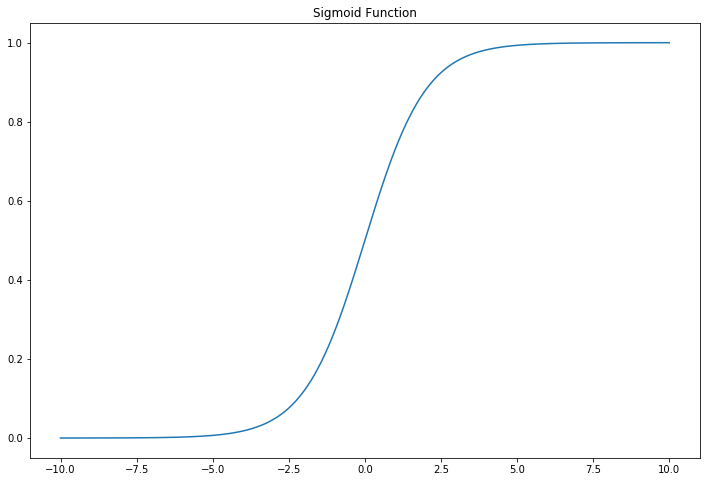

In [4]:
x = np.linspace(-10, 10, num = 1000)
plt.figure(figsize=(12, 8))
plt.plot(x, 1 / (1 + np.exp(-x))); #Sigmoid function
plt.title("Sigmoid Function");

***

The logistic regression equation has a very similar representation to linear regression. The difference is that the output value being modelled is binary in nature.
$$\hat{y}=\frac{e^{\beta_0+\beta_1x_1}}{1+\beta_0+\beta_1x_i}$$

or

$$\hat{y}=\frac{1.0}{1.0 + e^{-\beta_0-\beta_1x_i}}$$

$\beta_0$ is the intercept term

$\beta_1$ is the coefficient for $x_i$

$\hat{y}$ is the predicted output with real value between 0 and 1. To convert this to binary out of 0 or 1, this would either need to be rounded to an integer value or a custoff point be provided to spevify the class segregation point.

In [4]:
tmp = [0, 0.4, 0.6, 0.8, 1.0]

In [5]:
tmp

[0, 0.4, 0.6, 0.8, 1.0]

In [8]:
np.round(tmp)

array([0., 0., 1., 1., 1.])

What if we don't want 0.5 to be cutoff point?

In [9]:
np.array(tmp) > 0.7

array([False, False, False,  True,  True])

***

## Making Predictions with Logistic Regression

In [10]:
dataset = [[-2.0011, 0],
           [-1.4654, 0],
           [0.0965, 0],
           [1.3881, 0],
           [3.0641, 0],
           [7.6275, 1],
           [5.3324, 1],
           [6.9225, 1],
           [8.4754, 1],
           [7.6737, 1]]

In [11]:
coef = [-0.806605464, 0.2573316]

In [15]:
for row in dataset:
    yhat = 1.0 / (1.0 + np.exp(- coef[0] - coef[1] * row[0]))
    print("yhat {0:.4f}, yhat {1}".format(yhat, round(yhat)))

yhat 0.2106, yhat 0.0
yhat 0.2344, yhat 0.0
yhat 0.3139, yhat 0.0
yhat 0.3895, yhat 0.0
yhat 0.4955, yhat 0.0
yhat 0.7606, yhat 1.0
yhat 0.6377, yhat 1.0
yhat 0.7261, yhat 1.0
yhat 0.7981, yhat 1.0
yhat 0.7628, yhat 1.0


***

## Learning the Logistic Regression Model

The coefficients (Beta values b) of the logistic regression algorithm must be estimated from your training data. This is done using maximum-likelihood estimation.

Maximum-likelihood estimation is a common learning algorithm used by a variety of machine learning algorithms, although it does make assumptions about the distribution of your data.

The best coefficients would result in a model that would predict a value very close to 1 for the default class and a value for close to 0 for the other class. The intuiton for maximum-likelihood for logistic regression is that a search procedure seeks values for the corefficients ($\beta\$ values) that minimize the error in the probabilities predicted by the model to those in the data.

A minimization algorithm is used to optimize the best values for the coefficients for the training data. This is often done with efficient numerical optimization algorithms. While learning, we will implement it ourselves with a simpler gradient descent algorithm.

### Learning with Stochastic Gradient Descent

Logistic Regression uses gradiant descent to update the coefficients.

Each gradient descent iteration updates the coefficients using the equation:
$$\beta=\beta+learning  rate\times(y-\hat{y})\times\hat{y}\times(1-\hat{y})\times x$$

***

### Using Scikit Learn to Estimate Coefficients

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
dataset

[[-2.0011, 0],
 [-1.4654, 0],
 [0.0965, 0],
 [1.3881, 0],
 [3.0641, 0],
 [7.6275, 1],
 [5.3324, 1],
 [6.9225, 1],
 [8.4754, 1],
 [7.6737, 1]]

In [20]:
X = np.array(dataset)[:, 0:1]
y = np.array(dataset)[:, 1]

In [21]:
X, y

(array([[-2.0011],
        [-1.4654],
        [ 0.0965],
        [ 1.3881],
        [ 3.0641],
        [ 7.6275],
        [ 5.3324],
        [ 6.9225],
        [ 8.4754],
        [ 7.6737]]), array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.]))

In [23]:
clf_LR = LogisticRegression(C=1.0, penalty='l1', tol=0.01)

In [24]:
clf_LR.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.01, verbose=0, warm_start=False)

In [25]:
clf_LR.predict(X)

array([0., 0., 0., 0., 1., 1., 1., 1., 1., 1.])

In [26]:
clf_LR.predict_proba(X)

array([[0.89759418, 0.10240582],
       [0.87022294, 0.12977706],
       [0.75435978, 0.24564022],
       [0.61685444, 0.38314556],
       [0.41053351, 0.58946649],
       [0.06639687, 0.93360313],
       [0.18304064, 0.81695936],
       [0.09187854, 0.90812146],
       [0.0444747 , 0.9555253 ],
       [0.06497923, 0.93502077]])

***

## Classification Exercise

In [30]:
dataset2 = [[0.2, 0.],
           [0.2, 0.],
            [0.2, 0.],
            [0.2, 0.],
            [0.2, 0.],
            [0.4, 0.],
            [0.3, 0.],
            [0.2, 0.],
            [0.2, 0.],
            [0.1, 0.],
            [1.4, 1.],
            [1.5, 1.],
            [1.5, 1.],
            [1.3, 1.],
            [1.5, 1.],
            [1.3, 1.],
            [1.6, 1.],
            [1., 1.],
            [1.3, 1.],
            [1.4, 1.]]            

In [33]:
X = np.array(dataset2)[:, 0:1]
y = np.array(dataset2)[:, 1]

In [34]:
X, y

(array([[0.2],
        [0.2],
        [0.2],
        [0.2],
        [0.2],
        [0.4],
        [0.3],
        [0.2],
        [0.2],
        [0.1],
        [1.4],
        [1.5],
        [1.5],
        [1.3],
        [1.5],
        [1.3],
        [1.6],
        [1. ],
        [1.3],
        [1.4]]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.]))

In [42]:
clf_LR = LogisticRegression(C=1.0, penalty='l2', tol=0.0001)

In [43]:
clf_LR.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [45]:
pred = clf_LR.predict(X)
pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [41]:
clf_LR.predict_proba(X)

array([[0.79667466, 0.20332534],
       [0.79667466, 0.20332534],
       [0.79667466, 0.20332534],
       [0.79667466, 0.20332534],
       [0.79667466, 0.20332534],
       [0.6843085 , 0.3156915 ],
       [0.74452868, 0.25547132],
       [0.79667466, 0.20332534],
       [0.79667466, 0.20332534],
       [0.84045762, 0.15954238],
       [0.10098432, 0.89901568],
       [0.07710601, 0.92289399],
       [0.07710601, 0.92289399],
       [0.13120601, 0.86879399],
       [0.07710601, 0.92289399],
       [0.13120601, 0.86879399],
       [0.05850642, 0.94149358],
       [0.26848085, 0.73151915],
       [0.13120601, 0.86879399],
       [0.10098432, 0.89901568]])

In [47]:
np.column_stack((pred, y))

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])